In [123]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [124]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [146]:
dataset = datasets.ImageFolder(r'C:\Users\Gaurav Shahare\Desktop\catvsdogtrain', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [147]:
classes = ('cat', 'dog')


torch.Size([64, 3, 224, 224])
torch.Size([64])


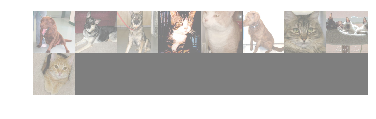

  dog   dog   dog   cat   cat   dog   cat   cat   cat


In [150]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()


# get some random training images
dataiter = iter(dataloader)
images, labels = dataiter.next()
print(images.size())
print(lables.size())

# show images
imshow(torchvision.utils.make_grid(images[:9]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(9)))

In [154]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1,stride=2)
        # convolutional layer (sees 56x56x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1,stride=2)
        # convolutional layer (sees 14x14x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 7 * 7 -> 500)
        self.fc1 = nn.Linear(64 * 7 * 7, 500)
        # linear layer (500 -> 2)
        self.fc2 = nn.Linear(500, 2)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with sigmoid activation function
        x=F.sigmoid(self.fc2(x))
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()



Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=2, bias=True)
  (dropout): Dropout(p=0.25)
)


In [155]:
import torch.optim as optim
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [156]:
n_epochs = 3

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data, target in dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
    print("epoch : {} loss {} ".format(epoch,train_loss))

epoch : 1 loss 17329.429596424103 
epoch : 2 loss 17327.872028827667 
epoch : 3 loss 17327.42934513092 


In [161]:
test_data = datasets.ImageFolder(r'C:\Users\Gaurav Shahare\Desktop\test1', transform=transform)

Dataset ImageFolder
    Number of datapoints: 12500
    Root Location: C:\Users\Gaurav Shahare\Desktop\test1
    Transforms (if any): Compose(
                             Resize(size=255, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                         )
    Target Transforms (if any): None